In [ ]:
# from: https://elitedatascience.com/keras-tutorial-deep-learning-in-python

In [57]:
import numpy as np
import random
np.random.seed(123)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

### Load MNIST data

In [27]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (X_train.shape)
# (60000, 28, 28)

(60000, 28, 28)


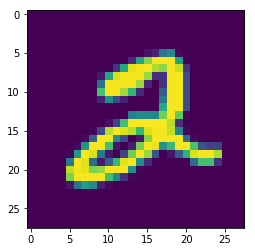

In [30]:
# Plotting first sample of X_trainPython

import matplotlib.pyplot as plt
image = X_train[5]
plt.imshow(image)
plt.show()

In [ ]:
# Import the `pyplot` module of `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
images_to_view = [1, 2, 3000, 50000]

# Fill out the subplots with the random images that you defined 
for i in range(len(images_to_view)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(X_train[images_to_view[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [ ]:
# Import `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images
images_to_view = [1, 2, 3000, 50000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(images_to_view)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(X_train[images_to_view[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(X_train[images_to_view[i]].shape, 
                                                  X_train[images_to_view[i]].min(), 
                                                  X_train[images_to_view[i]].max()))

In [31]:
# Reshape input data
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [32]:
print (X_train.shape)
# (60000, 1, 28, 28)

(60000, 1, 28, 28)


In [33]:
# Convert data type and normalize values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [34]:
print (y_train.shape)

(60000,)


In [40]:
print (y_train[:10])
# [5 0 4 1 9 2 1 3 1 4]
# The y_train and y_test data are not split into 10 distinct class labels, 
# but rather are represented as a single array with the class values.

[5 0 4 1 9 2 1 3 1 4]


In [41]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [42]:
print (Y_train.shape)

(60000, 10)


In [45]:
model = Sequential()

# CNN input layer
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28), 
                        dim_ordering='th'))
# The input shape parameter should be the shape of 1 sample. In this case, 
# it's the same (1, 28, 28) that corresponds to  the (depth, width, height) 
# of each digit image.

# But what do the first 3 parameters represent? They correspond to the number 
# of convolution filters to use, the number of rows in each convolution kernel,
# and the number of columns in each convolution kernel, respectively.

# DELETE LATER
# model.add(Dense(32, 
#                 activation='relu',
#                 input_dim=100))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy', 
#               metrics=['accuracy'])

C:\Users\Stebbins\Anaconda3_64\envs\py35\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), data_format="channels_first", input_shape=(1, 28, 28..., activation="relu")`
  """


In [46]:
print (model.output_shape)
# (None, 32, 26, 26)

(None, 32, 26, 26)


In [47]:
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

C:\Users\Stebbins\Anaconda3_64\envs\py35\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [48]:
# Fully connected dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [49]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [50]:
# Fit Keras model
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

C:\Users\Stebbins\Anaconda3_64\envs\py35\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 116s - loss: 0.2596 - acc: 0.9218   
Epoch 2/10
60000/60000 [==============================] - 118s - loss: 0.1057 - acc: 0.9687   
Epoch 3/10
60000/60000 [==============================] - 116s - loss: 0.0792 - acc: 0.9765   
Epoch 4/10
60000/60000 [==============================] - 116s - loss: 0.0646 - acc: 0.9804   
Epoch 5/10
60000/60000 [==============================] - 117s - loss: 0.0552 - acc: 0.9829   
Epoch 6/10
60000/60000 [==============================] - 117s - loss: 0.0460 - acc: 0.9857   
Epoch 7/10
60000/60000 [==============================] - 118s - loss: 0.0450 - acc: 0.9865   
Epoch 8/10
60000/60000 [==============================] - 118s - loss: 0.0392 - acc: 0.9874   
Epoch 9/10
60000/60000 [==============================] - 119s - loss: 0.0346 - acc: 0.9888   
Epoch 10/10
60000/60000 [==============================] - 119s - loss: 0.0342 - acc: 0.9889   


In [52]:
from keras.models import load_model
model.save('model_file.h5')

In [58]:
# Pick 10 random images
sample_indexes = random.sample(range(len(X_train)), 10)
sample_images = [X_train[i] for i in sample_indexes]
sample_labels = [y_train[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

NameError: name 'sess' is not defined

In [55]:
# Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=1)
print(score)

 9984/10000 [============================>.] - ETA: 0s[0.031005850302334419, 0.9909]
